In [1]:
import rasterio as rs
import rasterio.merge as rsmerge
from rasterio.plot import show
from rasterio.windows import Window

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

import os
from os.path import dirname, abspath, join

import numpy as np
import numpy


In [2]:
# GLOBAL PARAMS

current_url = os.getcwd()
home_url = dirname(abspath(current_url))
data_url = os.path.join(home_url, 'Data')
dtm_url = os.path.join(data_url, 'DTM')
dsm_url = os.path.join(data_url, 'DSM')
dtm_tiff_url = os.path.join(dtm_url, 'GeoTiff')
dsm_tiff_url = os.path.join(dsm_url, 'GeoTiff')
dtm_data_url = os.path.join(dtm_url, 'otherData')
dsm_data_url = os.path.join(dsm_url, 'otherData')


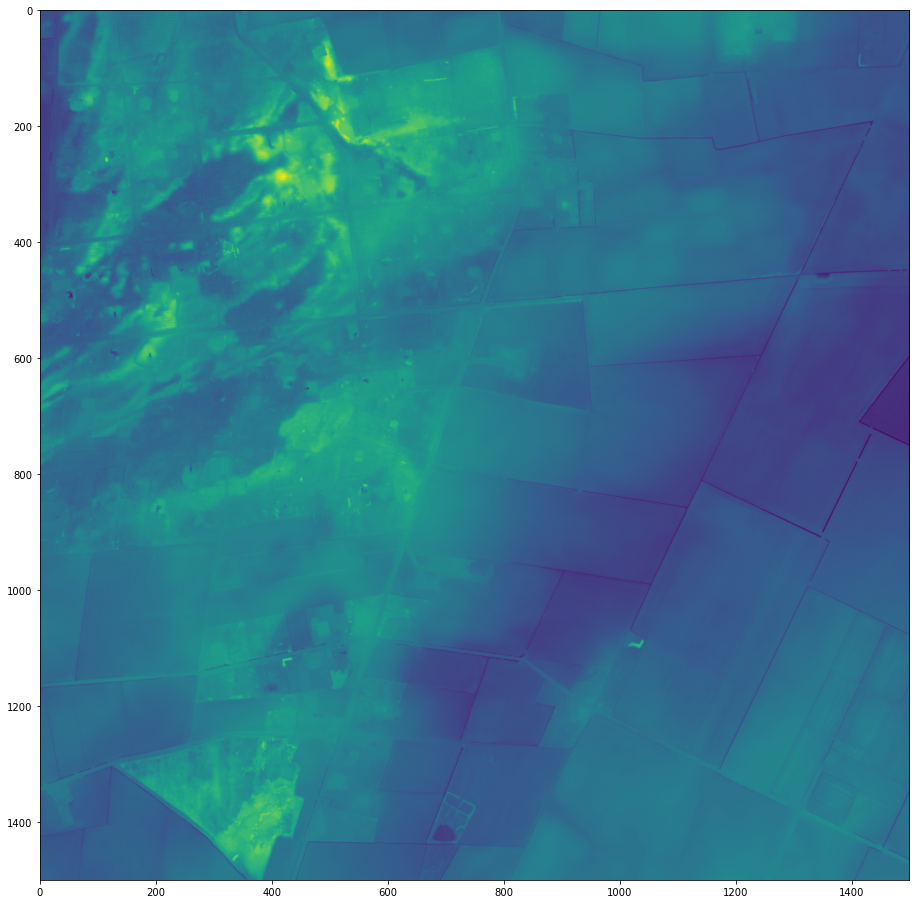

In [3]:
# working now with the first .tiff image.
file_name = 'DHMVIIDTMRAS1m_k01.tif'
file_url = os.path.join(dtm_tiff_url, file_name)

# open using rasterio which has the benefit of the .read() function giving a numpy array as a result.
img_dtm = rs.open(file_url)
full_img = img_dtm.read()

# crop the numpy array to avoid memoryErrors, which are very prone.
cropped_dtm = full_img[:, 7500:9000, 15500:17000]

# change figure size and plot is.
plt.figure(figsize=(22, 16))
plt.imshow(cropped_dtm[0, :, :])
plt.show()

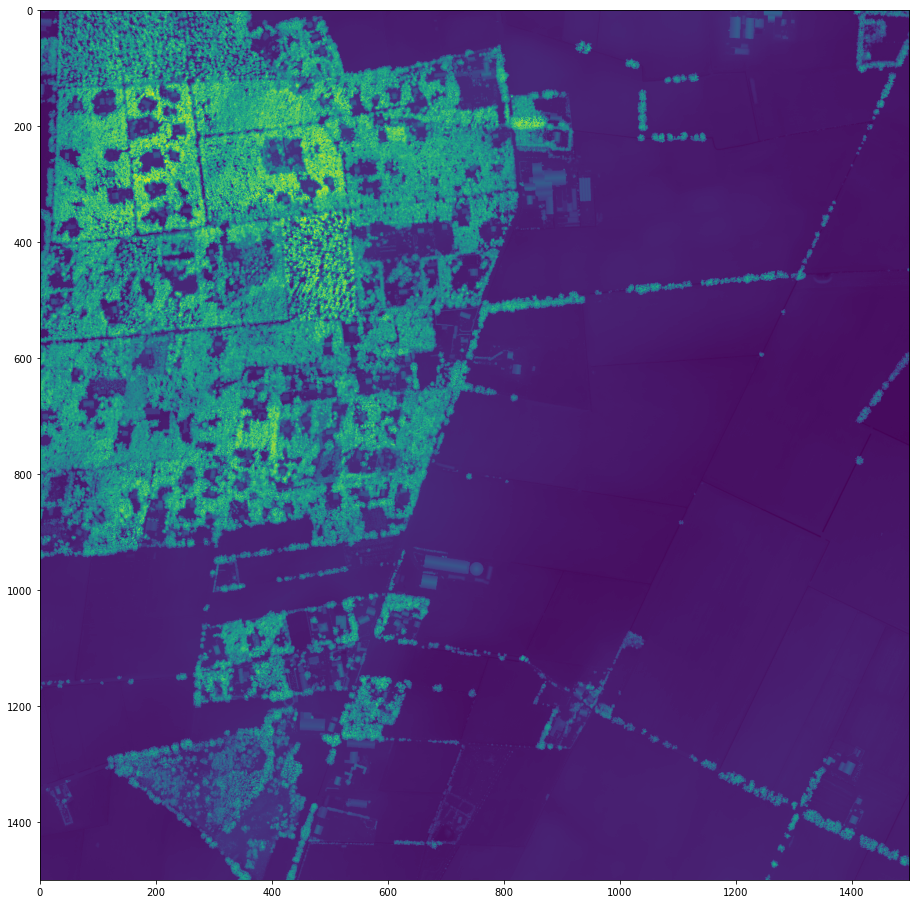

In [4]:
file_name = 'DHMVIIDSMRAS1m_k01.tif'
file_url = os.path.join(dsm_tiff_url, file_name)

img_dsm = rs.open(file_url)
full_img = img_dsm.read()
cropped_dsm = full_img[:, 7500:9000, 15500:17000]
plt.figure(figsize=(22, 16))
plt.imshow(cropped_dsm[0, :, :])
plt.show()

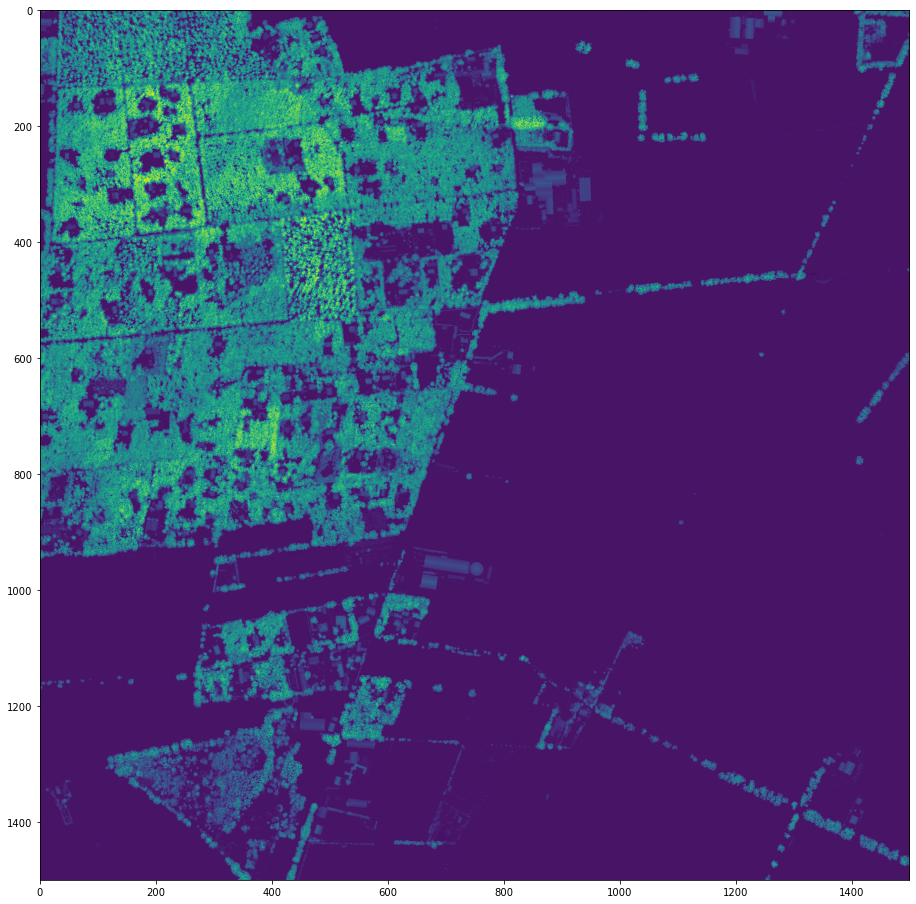

In [17]:
# a first look at what it looks like to combine the first 2 maps. This operation gives the most sensible looking result
new_dm = cropped_dsm - cropped_dtm
plt.figure(figsize=(22, 16))
plt.imshow(new_dm[0, :, :])
plt.show()

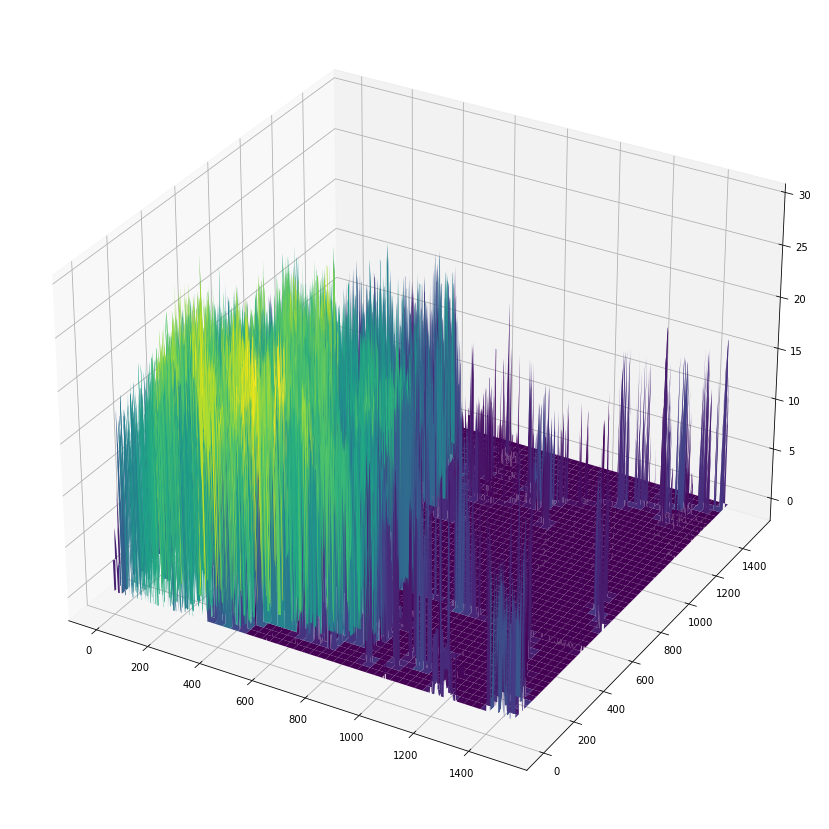

In [18]:
# how to handle 3d data from these tiff files. They are 1 dimensional numpy arrays.

# unpack the shape into x and y coordinates
n, m = new_dm[0].shape

# make a new meshgrid with the length of the size of the array
X, Y = np.meshgrid(np.arange(n), np.arange(m))

# create new figure of a certain size
fig = plt.figure(figsize=(20,15))

# create the axis needed for a 3d plot
ax = fig.add_subplot(111, projection='3d')

# add the x, y and z coordinates and some coloration
ax.plot_surface(X, Y, new_dm[0], cmap='viridis')

# change background color.
ax.set_facecolor('white')
plt.show()

In [ ]:
file_name = 'DHMVII_vdc_k01.shp'
file_url = os.path.join(other_data_url, file_name)

tes = gp.read_file(file_url)
tes.plot()
plt.show()